In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
def simple_plot(x, y):
    fig, ax = plt.subplots()
    ax.plot(x, y, 'o-')

    ax.set(xlabel='time (s)', ylabel='number of samples',
       title='Performance')
    ax.grid()

#fig.savefig("test.png")
    plt.show()

## Q1) This problem was recently asked by Google.

Given a list of numbers and a number k, return whether any two numbers from the list add up to k.

For example, given [10, 15, 3, 7] and k of 17, return true since 10 + 7 is 17.

Bonus: Can you do this in one pass?

OBS: Complexity O(n) because uses dict which is a hash table, so the operation in average is O(1)

Pair with given sum 3 is (1, 2)
Pair with given sum 3 is (1, 2)
Pair with given sum 3 is (1, 2)
Pair with given sum 3 is (1, 2)
Pair with given sum 3 is (1, 2)


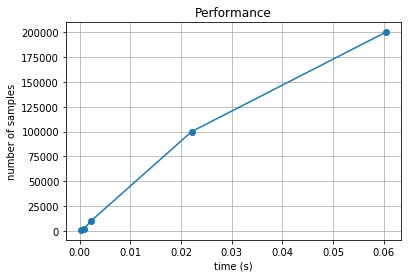

In [2]:
import time
import random

def two_sum_k(array, k):
    start = time.time()    
    #for i,val in enumerate(array):
    #    if k - val in array[i+1:]:
    #        print("Solution found : ", str(k - val)," + " ,str(array[i]))
    #        break
    #else:
    #    print ("No Solution Found")
    #s = set() 
    d = dict() 
    for i in range(0, len(array)): 
        temp = k-array[i] 
        if (temp in d): 
            print ("Pair with given sum "+ str(k) + " is (" + str(array[i]) + ", " + str(temp) + ")")
            break
        d[i] = (array[i]) 
    else:
        print("No solution was found")
    #print ()
    return result, (time.time() - start)

sizes = [1000,2000, 10000, 100000,200000]
seconds = [0,0,0,0,0]
result = 0
for index,s in enumerate(sizes):
    aux = [random.randint(5, 99999999999) for i in range(s)]
    aux.append(1)
    aux.append(2)
    result, seconds[index] = two_sum_k(aux, 3)
    
simple_plot(seconds,sizes)





## Q2 This problem was asked by Uber.

Given an array of integers, return a new array such that each element at index i of the new array is the product of all the numbers in the original array except the one at i.

For example, if our input was [1, 2, 3, 4, 5], the expected output would be [120, 60, 40, 30, 24]. If our input was [3, 2, 1], the expected output would be [2, 3, 6].

Follow-up: what if you can't use division?

In [3]:
#First Solution
def multiply_index_out(array): #8
    #Without considering that zero will be in the array
    #Can use extra space or division
    mult = 1
    for val in array:
        mult *= val
    
    result =[]
    for val in array:
        result.append(mult/val)
    print (result)

#time O(n)
#space O(n)
#multiply_index_out([1,2,3,4,5])

#Second Solution (brute force)
def mult_except_one(array):
    result = []
    
    for i in range(0,len(array)):
        aux=1    
        j = (i+1) % len(array)
        while ( j % len(array) !=  i ):
            aux = aux*array[j % len(array)]
            j+= 1  
        
        result.append(aux)
        
    print(result)
#mult_except_one([1,2,3,4,5])

#O(n²)

#Third Solution (bonus: without_division and faster)
def mult_except_one2(array): 
    aux = 1
    mult = [1 for i in range(len(array))] 
    
    for i in range(0, len(array)):
        mult[i] = aux
        aux *= array[i]

    aux = 1
    for i in range(len(array)-1, -1,-1):
        mult[i] *= aux
        aux *= array[i]
    
    print (mult)
#Time: O(n)
#Space: O(n)
mult_except_one2([1,2,3,4,5])


[120, 60, 40, 30, 24]


## Q3 This problem was asked by Google.

Given the root to a binary tree, implement serialize(root), which serializes the tree into a string, and deserialize(s), which deserializes the string back into the tree.

In [4]:
class Node: #45
    def __init__(self, val, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

def serialize(head): #O(n)
    if head == None:
        return ""
    
    result = head.val
    if head.left != None:
        result += "[" + serialize(head.left)+ "]"
    if head.right != None:
        result += "[" + serialize(head.right) +"]"
    
    return result

def deserialize(myString, head=None): #O(n)
    pos = myString.find("[")
    val = myString[:pos]
    
    count = 0
    count2 =0
    
    left,right = None, None
     
    for i in range(0, len(myString)):
        if (myString[i] == "["):
            count +=1
        elif (myString[i] == "]"):
            count2 +=1
        
        if (count == count2 and count!=0):
            left = deserialize(myString[pos+1:i+1])
            pos = i+1
            break

    count = 0
    count2 =0
    for i in range(pos, len(myString)):
        if (myString[i] == "["):
            count +=1
        elif (myString[i] == "]"):
            count2 +=1
        
        if (count == count2 and count!=0):
            right = deserialize(myString[pos+1:i+1])
            
            break
    return Node(val, left, right)
   
        

node = Node('root', Node('left', Node('left.left')), Node('right'))
x = deserialize(serialize(node))
print(x.left.val)
print(x.left.left.val)
print(x.right.val)
print(serialize(node))

assert deserialize(serialize(node)).left.left.val == 'left.left'



left
left.left
right
root[left[left.left]][right]


## Q4 This problem was asked by Stripe.

Given an array of integers, find the first missing positive integer in linear time and constant space. In other words, find the lowest positive integer that does not exist in the array. The array can contain duplicates and negative numbers as well.

For example, the input [3, 4, -1, 1] should give 2. The input [1, 2, 0] should give 3.

You can modify the input array in-place.

In [5]:
def lowest_positive_integer(array):
    j = len(array)-1
    #for i in range(len(array)-1):
    i=0
    while i < len(array)-1 and i < j:
        if array[i] < 0:
            
            aux = array[j]
            array[j] = array[i]
            array[i] = aux
            #print(array[i])

            j-=1
        i+=1
    
    i=0
    aux = array[0]
    print(array)
    while i < (j+2):
        
        if aux < j+1 and aux != -1:
            newAux = array[aux]
            array[aux] =-1
            aux = newAux

        else:
            aux = array[i]
            i+=1
       # print(aux)
    print(array)
    for i in range(len(array)):
        if array[i] != i and array[i]!=-1:
            result = i
            break
    print(result)
    
array = [3,4,-1,1]
array = [-1,1,9,8,9,15,22,1,2,-2,6,3,4,7,12,-1,-1,5,0]
lowest_positive_integer(array)

[0, 1, 9, 8, 9, 15, 22, 1, 2, 5, 6, 3, 4, 7, 12, -1, -1, -2, -1]
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 6, 3, -1, 7, 12, -1, -1, -2, -1]
10


## Q5 This problem was asked by Jane Street.

cons(a, b) constructs a pair, and car(pair) and cdr(pair) returns the first and last element of that pair. For example, car(cons(3, 4)) returns 3, and cdr(cons(3, 4)) returns 4.

Given this implementation of cons:

def cons(a, b):
    def pair(f):
        return f(a, b)
    return pair
Implement car and cdr.

In [1]:
def cons(a, b): #Functional programming
    def pair(f):
        return f(a, b)
    return pair

def car(f):
    def first(a, b):
        return a
    return f(first)

def cdr(f):
    def second(a,b):
        return b
    return f(second)

print(car(cons(3,4)))
print(cdr(cons(3,4)))

3
4
